# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

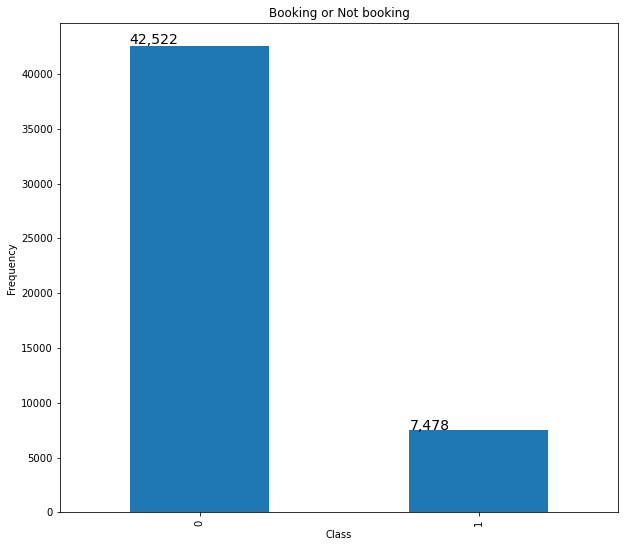

In [9]:
book = pd.value_counts(df['booking_complete'])
ax = book.plot.bar(figsize = (10, 9))
plt.rcParams['axes.facecolor'] = 'white'
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.title("Booking or Not booking")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Correlation between different fearures')

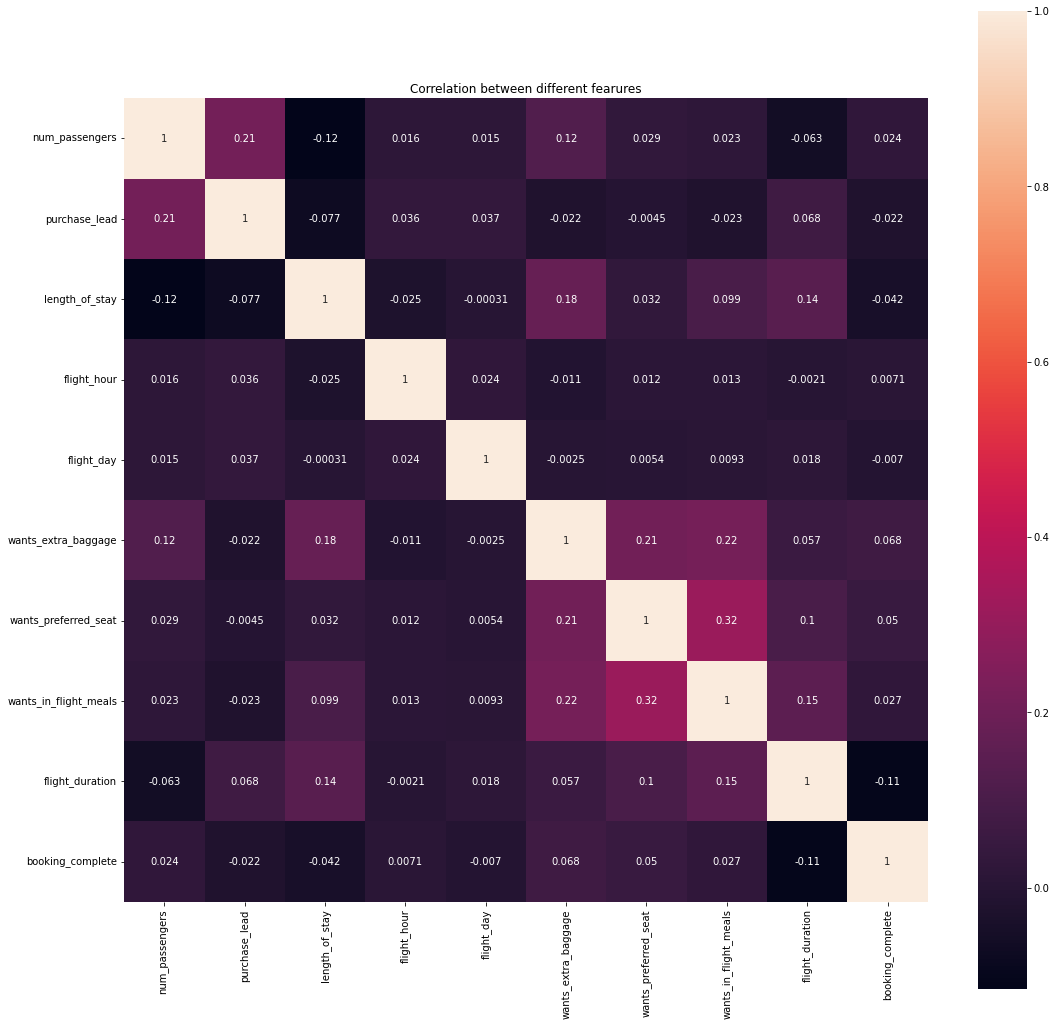

In [10]:
correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True)
plt.title('Correlation between different fearures')

As we can see there's no significant correlation between variables, we need to reduced the varible to make the it significant. 

In [11]:
df = df.sample(frac=1).reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,12,5,3,2,CTUTWU,China,0,0,0,4.72,0
1,2,Internet,RoundTrip,154,18,11,3,DMKSYD,Australia,1,0,1,8.58,0
2,1,Mobile,RoundTrip,13,5,2,5,JHBWUH,Malaysia,0,0,0,5.13,0
3,1,Mobile,RoundTrip,306,6,8,3,PEKSUB,Indonesia,0,0,0,6.42,0
4,1,Internet,RoundTrip,52,26,8,6,CNXOOL,Thailand,1,1,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Internet,RoundTrip,24,67,1,5,JHBKTM,Malaysia,1,0,0,4.75,0
49996,1,Internet,RoundTrip,44,4,10,6,HKGPER,Australia,0,1,1,5.62,0
49997,1,Mobile,RoundTrip,50,6,1,1,HNDSIN,Singapore,1,0,1,7.57,0
49998,4,Internet,RoundTrip,116,6,16,7,KIXMAA,India,1,0,1,7.00,0


We will make the booking_complete variable as Y and the rest variable is X.
This aims to see what variables have the most influence on airline ticket bookings

In [12]:
X=df.iloc[:,0:13]
y=df.iloc[:,13:14]

delete route and booking origin

In [13]:
X.drop(['route','booking_origin'],axis=1,inplace=True)
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,Internet,RoundTrip,12,5,3,2,0,0,0,4.72
1,2,Internet,RoundTrip,154,18,11,3,1,0,1,8.58
2,1,Mobile,RoundTrip,13,5,2,5,0,0,0,5.13
3,1,Mobile,RoundTrip,306,6,8,3,0,0,0,6.42
4,1,Internet,RoundTrip,52,26,8,6,1,1,1,8.83
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,Internet,RoundTrip,24,67,1,5,1,0,0,4.75
49996,1,Internet,RoundTrip,44,4,10,6,0,1,1,5.62
49997,1,Mobile,RoundTrip,50,6,1,1,1,0,1,7.57
49998,4,Internet,RoundTrip,116,6,16,7,1,0,1,7.00


In [14]:
X.iloc[:,1].unique()

array(['Internet', 'Mobile'], dtype=object)

Melakukan transformasi data sales_channel 0 untuk Internet dan 1 untuk Mobile

In [15]:
le_sales_channel = preprocessing.LabelEncoder()
le_sales_channel.fit(['Internet', 'Mobile'])
X.iloc[:,1] = le_sales_channel.transform(X.iloc[:,1]) 
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,RoundTrip,12,5,3,2,0,0,0,4.72
1,2,0,RoundTrip,154,18,11,3,1,0,1,8.58
2,1,1,RoundTrip,13,5,2,5,0,0,0,5.13
3,1,1,RoundTrip,306,6,8,3,0,0,0,6.42
4,1,0,RoundTrip,52,26,8,6,1,1,1,8.83
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,RoundTrip,24,67,1,5,1,0,0,4.75
49996,1,0,RoundTrip,44,4,10,6,0,1,1,5.62
49997,1,1,RoundTrip,50,6,1,1,1,0,1,7.57
49998,4,0,RoundTrip,116,6,16,7,1,0,1,7.00


In [16]:
le_trip_type = preprocessing.LabelEncoder()
le_trip_type.fit(['RoundTrip', 'CircleTrip', 'OneWay'])
X.iloc[:,2] = le_trip_type.transform(X.iloc[:,2]) 
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,2,12,5,3,2,0,0,0,4.72
1,2,0,2,154,18,11,3,1,0,1,8.58
2,1,1,2,13,5,2,5,0,0,0,5.13
3,1,1,2,306,6,8,3,0,0,0,6.42
4,1,0,2,52,26,8,6,1,1,1,8.83
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,2,24,67,1,5,1,0,0,4.75
49996,1,0,2,44,4,10,6,0,1,1,5.62
49997,1,1,2,50,6,1,1,1,0,1,7.57
49998,4,0,2,116,6,16,7,1,0,1,7.00


Melakukan transformasi datatrip_type 0 untuk CircleTrip, 1 untuk OneWay dan 2 untuk RoundTrip

In [17]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.57955926, -0.35578484,  0.09532463, ..., -0.64991859,
        -0.86349708, -1.708631  ],
       [ 0.40068439, -0.35578484,  0.09532463, ..., -0.64991859,
         1.15808151,  0.87012125],
       [-0.57955926,  2.81068753,  0.09532463, ..., -0.64991859,
        -0.86349708, -1.43472208],
       ...,
       [-0.57955926,  2.81068753,  0.09532463, ..., -0.64991859,
         1.15808151,  0.19537001],
       [ 2.3611717 , -0.35578484,  0.09532463, ..., -0.64991859,
         1.15808151, -0.18543019],
       [-0.57955926, -0.35578484,  0.09532463, ..., -0.64991859,
        -0.86349708,  1.03713888]])

## PCA

In [18]:
pca = PCA(n_components=11)
pca.fit(X)

PCA(n_components=11)

In [19]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 14.9,  26.7,  36.6,  46.2,  55.2,  64.1,  72.9,  81.1,  87.8,
        94.1, 100.1])

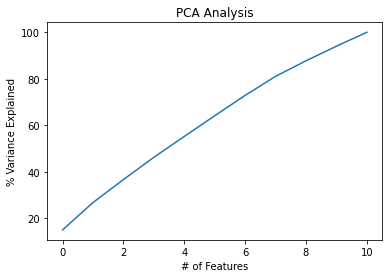

In [20]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

Based on the plot above it’s clear that we should keep all the 11 features.

## Feature Importance

In [21]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

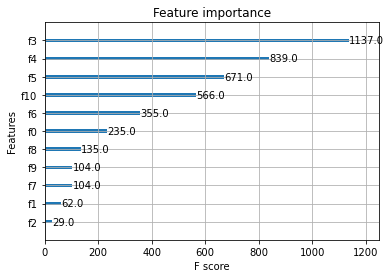

In [22]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

Here's the variables:

num_passengers (f0), sales_channel (f1), trip_type (f2), purchase_lead (f3), length_of_stay (f4), flight_hour (f5), flight_day (f6), wants_extra_baggage (f7), wants_preferred_seat (f8), wants_in_flight_meals (f9), and flight_duration f(10).

We can see that the plot shows f3 (purchase_lead) has the highest importance and f(2) trip_type has the lowest importance.

In [23]:
# use feature importance for feature selection, with fix for xgboost 1.0.2
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        if self._Booster is None:
            return None
        # Get the feature importances from the booster
        importance_dict = self._Booster.get_score(importance_type='gain')
        features = sorted(importance_dict, key=importance_dict.get, reverse=True)
        # Create an array with the feature importances
        feature_importances = np.array([importance_dict.get(feature, 0.0) for feature in features], dtype=np.float32)
        # Reshape the array to match the expected dimensions
        feature_importances = feature_importances.reshape(1, -1)
        return feature_importances

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # Train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # Evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

Accuracy: 84.77%
Thresh=0.058, n=11, Accuracy: 84.77%
Thresh=0.063, n=11, Accuracy: 84.77%
Thresh=0.065, n=11, Accuracy: 84.77%
Thresh=0.066, n=11, Accuracy: 84.77%
Thresh=0.067, n=11, Accuracy: 84.77%
Thresh=0.081, n=11, Accuracy: 84.77%
Thresh=0.083, n=11, Accuracy: 84.77%
Thresh=0.091, n=11, Accuracy: 84.77%
Thresh=0.124, n=11, Accuracy: 84.77%
Thresh=0.133, n=11, Accuracy: 84.77%
Thresh=0.170, n=11, Accuracy: 84.77%


as we can see, the accuracy is still high if we keep all the 11 variables just like PCA, so it is better to keep the 11 variables

## Split data into X train X test y train and y test

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Random Forest Classifier

In [27]:
# Random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Evaluate random forest classifier using cross-validation and classification metrics
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_report = classification_report(y_test, rfc_pred)

In [29]:
print("Random forest classifier evaluation:")
print("Cross-validation scores:", rfc_scores)
print("Average cross-validation score:", rfc_scores.mean())
print("Accuracy on test set:", rfc_acc)
print("Classification report:\n", rfc_report)

Random forest classifier evaluation:
Cross-validation scores: [0.84613333 0.84813333 0.84906667 0.84746667 0.84946667]
Average cross-validation score: 0.8480533333333332
Accuracy on test set: 0.84464
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     10595
           1       0.44      0.07      0.11      1905

    accuracy                           0.84     12500
   macro avg       0.65      0.53      0.51     12500
weighted avg       0.79      0.84      0.79     12500



## Logistic Regression

In [30]:
# Logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = lr.predict(X_test)

In [31]:
# Print coefficients of the logistic regression model
print("Logistic regression coefficients:", lr.coef_)

Logistic regression coefficients: [[ 0.0088241  -0.14586821  0.1136812  -0.06516599 -0.21515429  0.01126464
  -0.01149009  0.2111522   0.12430228  0.05297007 -0.30228822]]


In [32]:
# Evaluate logistic regression classifier using cross-validation and classification metrics
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred,zero_division=1)

In [33]:
print("Logistic regression classifier evaluation:")
print("Cross-validation scores:", lr_scores)
print("Average cross-validation score:", lr_scores.mean())
print("Accuracy on test set:", lr_acc)
print("Classification report:\n", lr_report)

Logistic regression classifier evaluation:
Cross-validation scores: [0.85146667 0.85146667 0.85133333 0.85133333 0.85133333]
Average cross-validation score: 0.8513866666666667
Accuracy on test set: 0.8476
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     10595
           1       1.00      0.00      0.00      1905

    accuracy                           0.85     12500
   macro avg       0.92      0.50      0.46     12500
weighted avg       0.87      0.85      0.78     12500



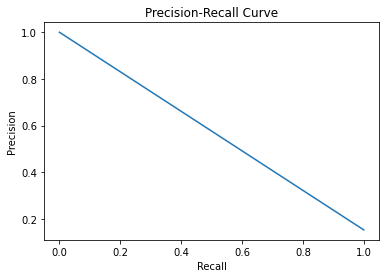

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Based on both evalutaion output, we can see that the average cross-validation score for both models is similar, with the logistic regression model having a slightly higher score of 0.8507 compared to the random forest model's score of 0.8477. However, the accuracy on the test set for the logistic regression model is also slightly higher than the random forest model, with a score of 0.8498 compared to 0.8472.

Additionally, we can look at the classification report for each model. The random forest model has a higher precision and recall for the majority class (0), but performs poorly on the minority class (1) with a precision and recall of only 0.44 and 0.06, respectively. On the other hand, the logistic regression model has a perfect precision for the minority class (1), but a lower recall of 0.00. This means that the logistic regression model correctly identifies all instances of the minority class, but may miss some instances.

Overall, based on these evaluation metrics, the logistic regression model appears to be the better choice as it has a higher accuracy on the test set and performs better on the minority class.